In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as sps
import warnings
from scipy import *
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew
import statsmodels.api as sm
from sklearn.datasets import load_boston
from pandas.tseries.offsets import MonthEnd

import pandas_datareader as pdr
from datetime import datetime

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
warnings. filterwarnings('ignore')

In [7]:
%%bash
pip install yahoo-finance

In [8]:
%%bash
pip install pandas-datareader

Enter ticker of a share: YNDX


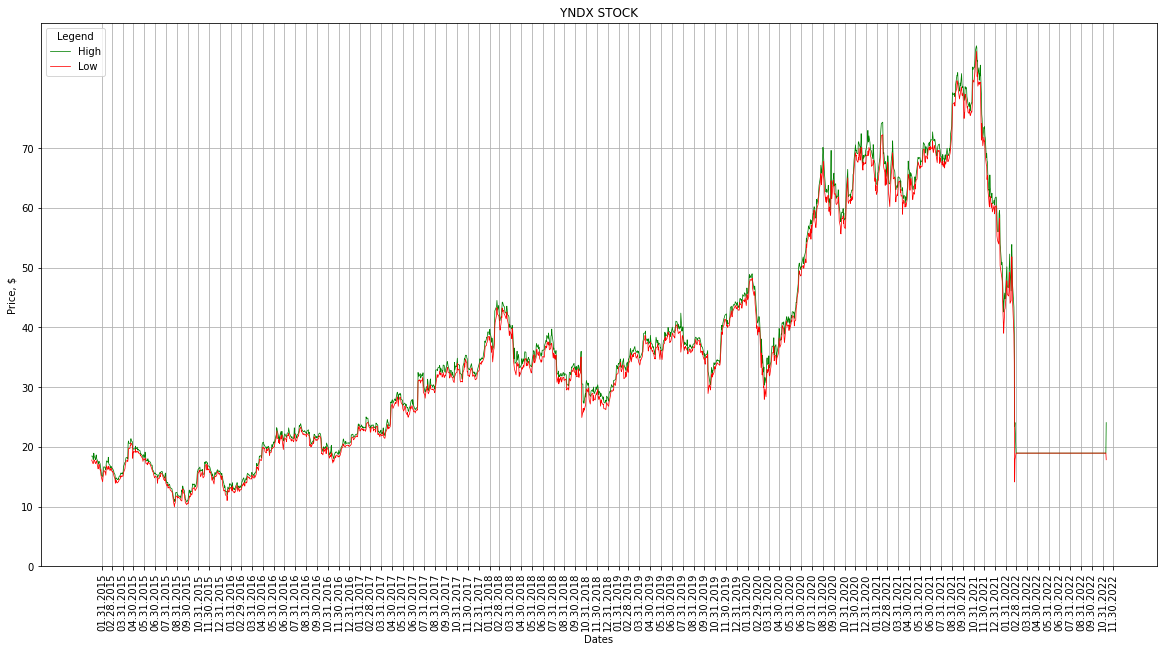

In [601]:
start_date = datetime(2015, 1, 1)
end_date = datetime.now()

ticker = input('Enter ticker of a share: ')
df = pdr.get_data_yahoo(symbols = f'{stock.upper()}', start = start_date, end = end_date)


date = df.index[0]
dates = []

while date < df.index[-1]:
    date = date + MonthEnd(1)
    dates.append(date)

maxhigh = int(df.High.max()//10 * 10)    
    
    
high_prices_line = plt.plot(df.index, df['High'], label = 'High', linewidth = 0.5, color = 'g', alpha = 0.7)
low_prices_line = plt.plot(df.index, df['Low'], label = 'Low', linewidth = 0.5, color = 'r', alpha = 0.7)
plt.setp([high_prices_line, low_prices_line], linewidth = 0.75, alpha = 1)


plt.xticks(dates, labels = [pd.to_datetime(str(date)).strftime('%m.%d.%Y') for date in dates], 
                               rotation = 'vertical')
plt.yticks(range(0,maxhigh ,10), labels = range(0,maxhigh ,10))

plt.title(f'{stock.upper()} STOCK')
plt.grid()
plt.xlabel('Dates')
plt.ylabel('Price, $')


plt.legend(loc = 'upper left', title = 'Legend')
plt.show()

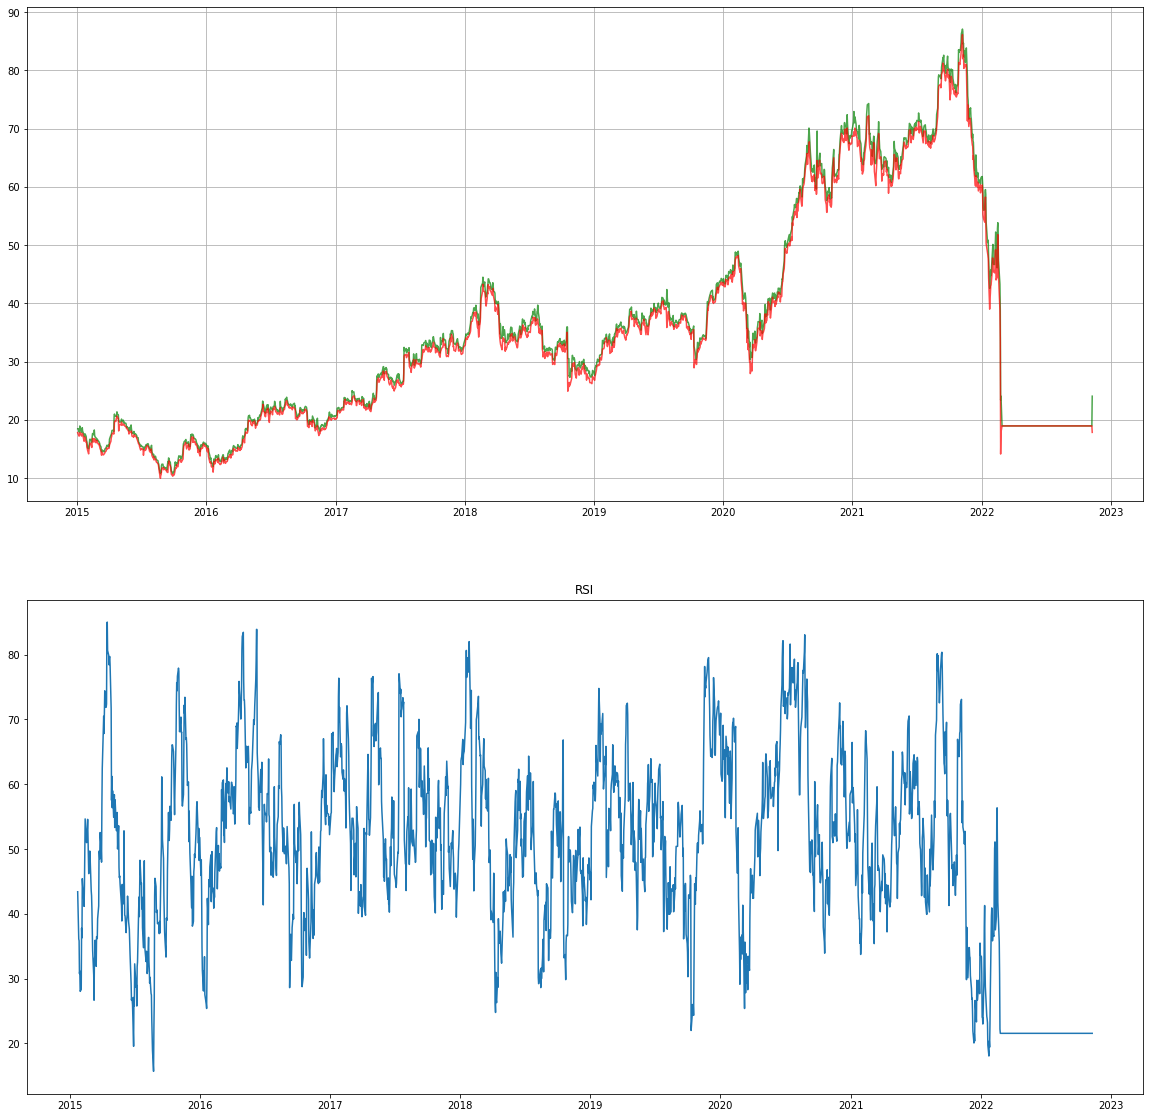

In [602]:
def RSI(df, N = 14, EMA = True):
    
    diffclose = df.Close.diff()
    cu = diffclose.clip(lower=0)
    cd = abs(diffclose.clip(upper=0))

    CU = cu.ewm(com = N - 1, min_periods = N).mean()
    CD = cd.ewm(com = N - 1, min_periods = N).mean()
        
    RS = CU / CD
    RSI = 100 - (100/(1 + RS))
    
    return pd.DataFrame(data = RSI)


fig, axes = plt.subplots(2, 1, figsize = ([20,20]))

highline = axes[0].plot(df.High, color = 'g', alpha = 0.7)
lowline = axes[0].plot(df.Low, color = 'r', alpha = 0.7)
axes[0].grid()
axes[1].plot(RSI(df = df))
plt.title('RSI')
plt.show()

Базовые метрики
count    1980.000000
mean       -0.033904
std         0.784015
min        -6.139999
25%        -0.339999
50%         0.000000
75%         0.310001
max         5.759998
Name: diff_price, dtype: float64

---------------------------------------------

Самые популярные значения, ТОП 5
 0.000000    191
-0.070000     17
-0.049999     15
 0.090000     14
-0.090000     14
Name: diff_price, dtype: int64

---------------------------------------------

Эксцесс:  9.452168450412225
Ассиметрия:  -0.925385838808829

---------------------------------------------


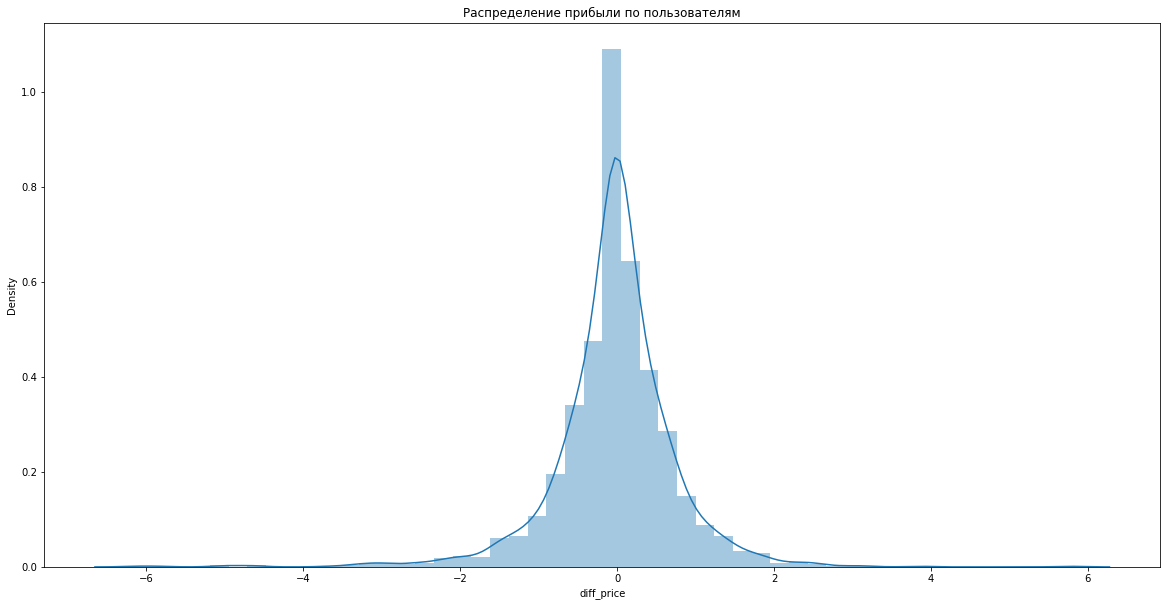

In [603]:
def my_basic_research(df, columns):
    print('Базовые метрики')
    print(df[columns].describe())
    print('\n---------------------------------------------\n')
    
    print('Самые популярные значения, ТОП 5')
    print(df[columns].value_counts().nlargest(5) )
    print('\n---------------------------------------------\n')
    
    print('Эксцесс: ', kurtosis(df[columns]))
    print('Ассиметрия: ', skew(df[columns]))
    print('\n---------------------------------------------')
    
    sns.distplot(df[columns])
    plt.title('Распределение прибыли по пользователям')

df['diff_price'] = df.Close - df.Open
my_basic_research(df = df, columns = 'diff_price')

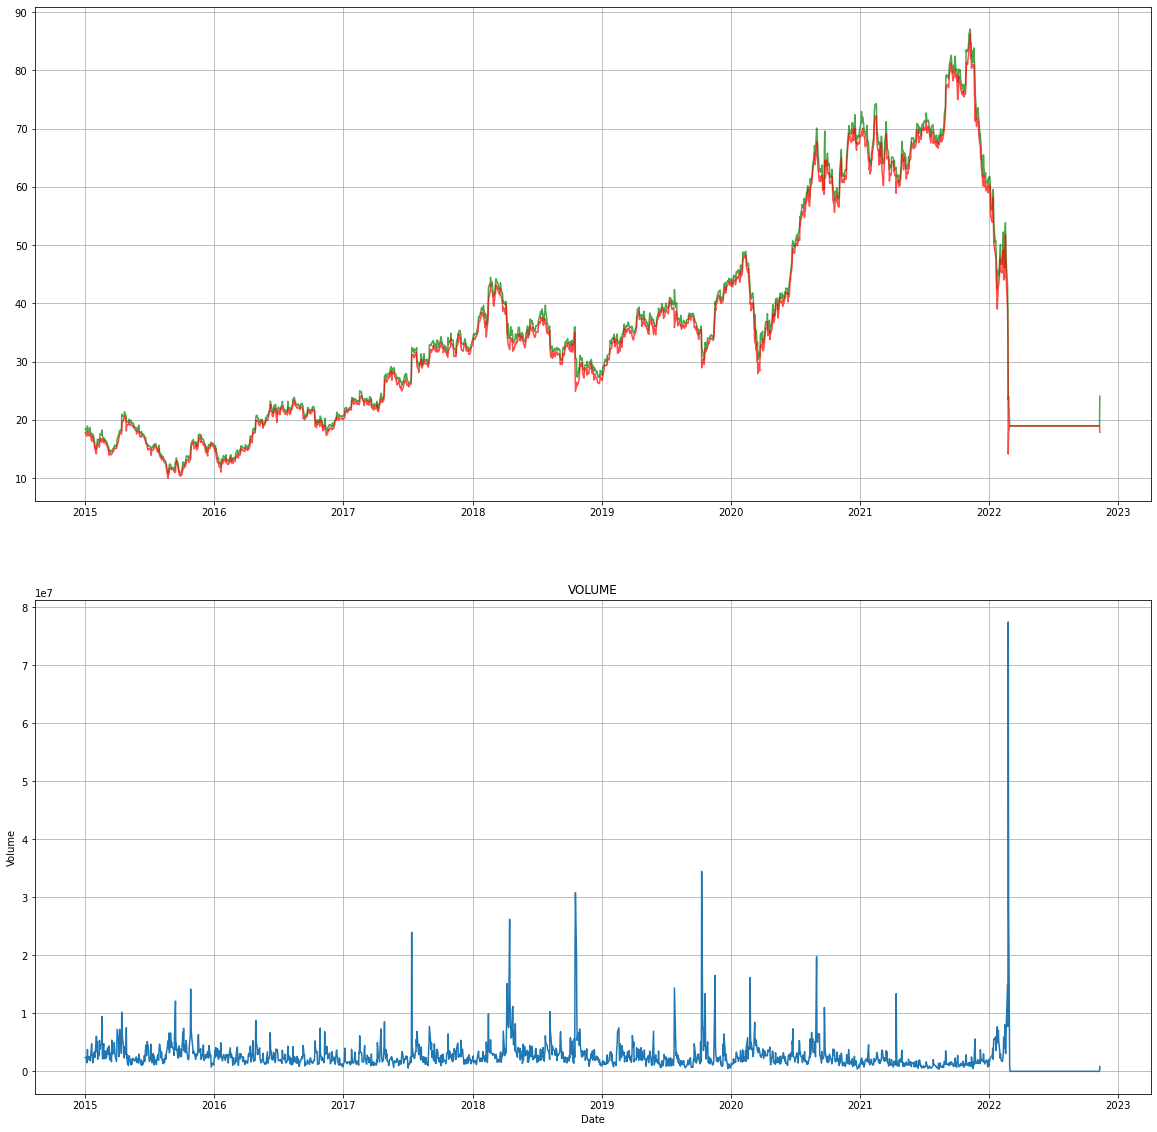

In [604]:
fig, axes = plt.subplots(2, 1, figsize = ([20,20]))

axes[0].plot(df.High, color = 'g', alpha = 0.7)
axes[0].plot(df.Low, color = 'r', alpha = 0.7)
axes[0].grid()
sns.lineplot(df.index, df.Volume)
axes[1].grid()
plt.title('VOLUME')
plt.show()

In [605]:
DJI = pdr.get_data_yahoo(symbols = '^DJI', start = start_date, end = end_date)
SP500 = pdr.get_data_yahoo(symbols = '^GSPC', start = start_date, end = end_date)
NASDAQ = pdr.get_data_yahoo(symbols = '^IXIC', start = start_date, end = end_date)
RUSSELL = pdr.get_data_yahoo(symbols = '^RUT', start = start_date, end = end_date)

df.pop('diff_price')
print('')

In [606]:
djidf = (df.merge(DJI, how = 'inner', on = 'Date'))

In [607]:
spdf = (df.merge(SP500, how = 'inner', on = 'Date'))

In [608]:
ndxdf = (df.merge(NASDAQ, how = 'inner', on = 'Date'))

In [609]:
rusdf = (df.merge(RUSSELL, how = 'inner', on = 'Date'))

<AxesSubplot:>

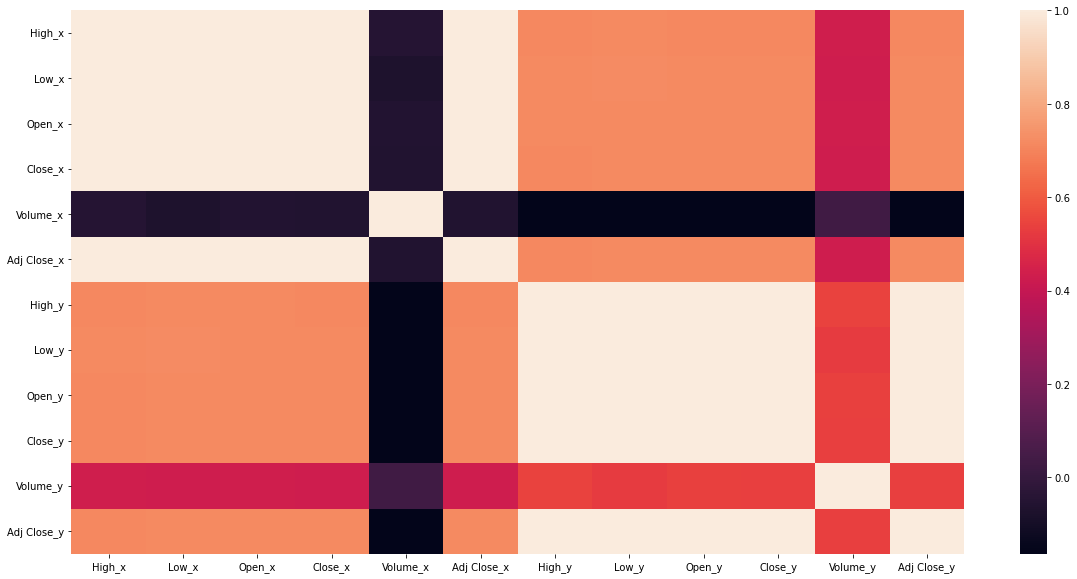

In [610]:
sns.heatmap(djidf.corr())

<AxesSubplot:>

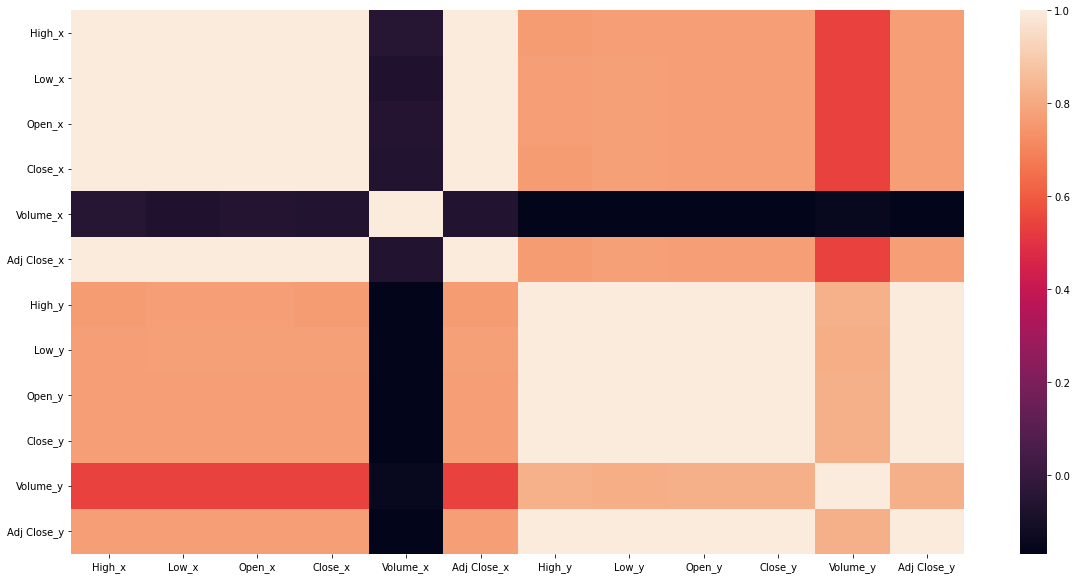

In [611]:
sns.heatmap(ndxdf.corr())

<AxesSubplot:>

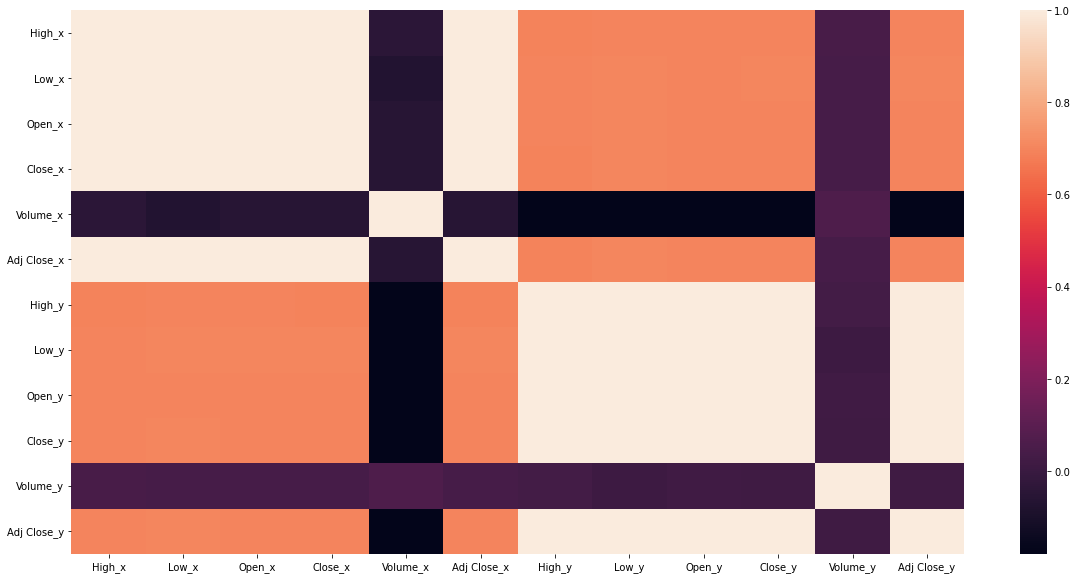

In [612]:
sns.heatmap(spdf.corr())

<AxesSubplot:>

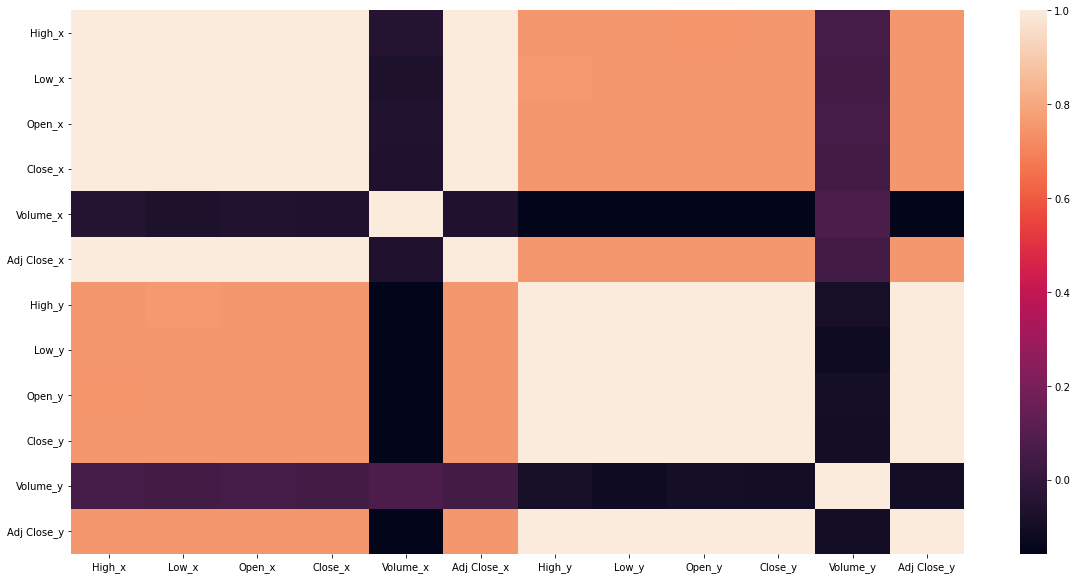

In [613]:
sns.heatmap(rusdf.corr())

In [614]:
print(f'Summary of correlation with Dow-Jones index: {djidf.corr().sum().sum()}')
print(f'Summary of correlation with NASDAQ index: {ndxdf.corr().sum().sum()}')
print(f'Summary of correlation with SP500 index: {spdf.corr().sum().sum()}')
print(f'Summary of correlation with RUSSELL 2000 index: {rusdf.corr().sum().sum()}\n')

cormax = max(djidf.corr().sum().sum(), ndxdf.corr().sum().sum(), spdf.corr().sum().sum(), rusdf.corr().sum().sum())
cormin = min(djidf.corr().sum().sum(), ndxdf.corr().sum().sum(), spdf.corr().sum().sum(), rusdf.corr().sum().sum())

if cormax == djidf.corr().sum().sum():
    cormax = 'Dow Jones Industrial index'
elif cormax == ndxdf.corr().sum().sum():
    cormax = 'NASDAQ Composite index'
elif cormax == spdf.corr().sum().sum():
    cormax = 'S&P 500 index'
elif cormax == rusdf.corr().sum().sum():
    cormax = 'Russell 2000'

if cormin == djidf.corr().sum().sum():
    cormin = 'Dow Jones Industrial index'
elif cormin == ndxdf.corr().sum().sum():
    cormin = 'NASDAQ Composite index'
elif cormin == spdf.corr().sum().sum():
    cormin = 'S&P 500 index'
elif cormin == rusdf.corr().sum().sum():
    cormin = 'Russell 2000'


print(f'The best correlation of {stock.upper()} is with: {cormax}\n')
print(f'The worst correlation of {stock.upper()} is with: {cormin}')

Summary of correlation with Dow-Jones index: 95.2326910735344
Summary of correlation with NASDAQ index: 101.53704378842565
Summary of correlation with SP500 index: 85.22103863891373
Summary of correlation with RUSSELL 2000 index: 87.13321403747044

The best correlation of YNDX is with: NASDAQ Composite index

The worst correlation of YNDX is with: S&P 500 index


In [615]:
DJI

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,17951.779297,17731.300781,17823.070312,17832.990234,76270000,17832.990234
2015-01-05,17821.300781,17475.929688,17821.300781,17501.650391,116160000,17501.650391
2015-01-06,17581.050781,17262.369141,17504.179688,17371.640625,101870000,17371.640625
2015-01-07,17597.080078,17374.779297,17374.779297,17584.519531,91030000,17584.519531
2015-01-08,17916.039062,17591.970703,17591.970703,17907.869141,114890000,17907.869141
...,...,...,...,...,...,...
2022-11-04,32611.519531,31938.919922,32265.009766,32403.220703,422370000,32403.220703
2022-11-07,32895.589844,32424.990234,32454.099609,32827.000000,336300000,32827.000000
2022-11-08,33355.390625,32831.460938,32934.558594,33160.828125,335340000,33160.828125


In [623]:
df['total_traded, $'] = df.Volume * (df.Open + df.Close)/2

In [626]:
df.head(5)

,High,Low,Open,Close,Volume,Adj Close,"total_traded, $"
Date,,,,,,,
2015-01-02,18.440001,17.780001,18.020000,18.370001,2384500,18.370001,4.338598e+07
2015-01-05,18.430000,17.290001,18.389999,17.410000,2430300,17.410000,4.350237e+07
2015-01-06,17.870001,17.180000,17.370001,17.530001,1904500,17.530001,3.323353e+07
2015-01-07,17.870001,17.330000,17.790001,17.370001,1471300,17.370001,2.586546e+07
2015-01-08,18.930000,17.680000,17.680000,18.420000,3764200,18.420000,6.794381e+07


In [643]:
most_traded_day = df[df['total_traded, $'] == df['total_traded, $'].max()].index[0]

Most traded day was: (24, 'February', 2022)


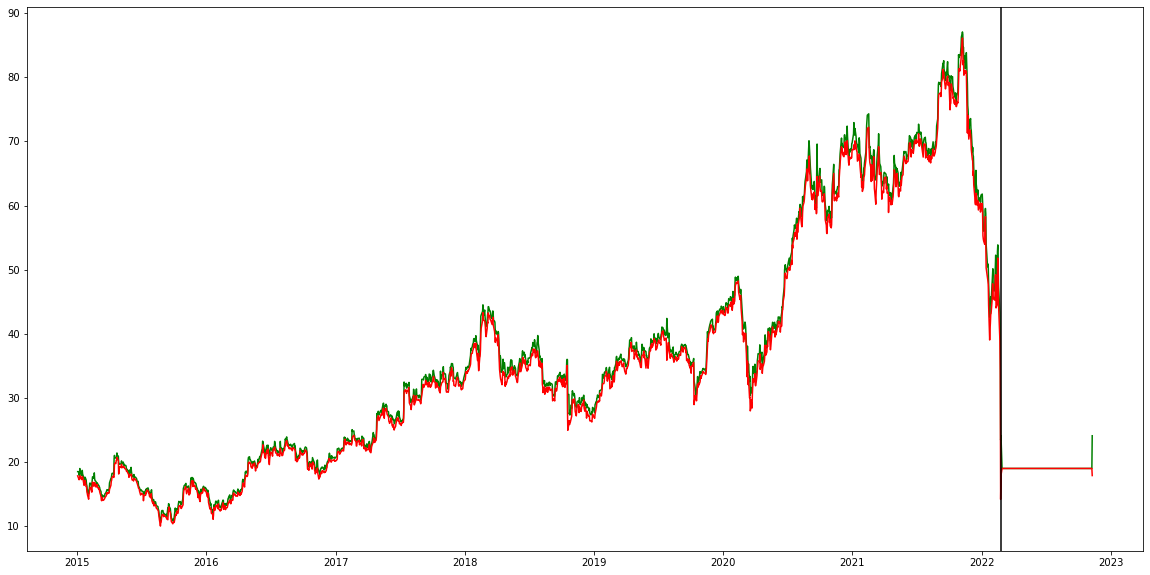

In [661]:
plt.plot(df.High, color = 'g')
plt.plot(df.Low, color = 'r')
plt.axvline(most_traded_day, color = 'black')
print(f'Most traded day was: {most_traded_day.day, most_traded_day.month_name(), most_traded_day.year}')
plt.show()